# SVM

Objective: Build a model to predict "Drug Like" properties of a 
            single compound.

Data: ADME descriptors for 3 libraries.
    Libraries:
        AFRODB
        Biofacquim
        FDA
        
    Endpoint: "Drug Like" (Binary)
        1 -> Drug Like
        0 -> No Drug Like
        
    Descriptors
        ADME descriptors:
            '#Aromatic heavy atoms'
            '#H-bond acceptors'
            '#H-bond donors'
            '#Heavy atoms'
            '#Rotatable bonds'
            'Ali Log S'
            'Ali Solubility (mg/ml)'   
Method: Support Vector Machine

## Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#
import os

## Open Database

In [5]:
pwd

'/home/babs/Documents/DIFACQUIM/CABANA_CHEMOINFORMATICS/Day_4/Supervised_Learning_Classifications/SVM'

In [6]:
#Modify Dataset location
Data = pd.read_csv("/home/babs/Documents/DIFACQUIM/CABANA_CHEMOINFORMATICS/Day_4/Supervised_Learning_Classifications/SVM/Data/Data_SVM.csv", sep = ",")
Data = Data.drop("Unnamed: 0", axis = 1)
Data.head()

,#Aromatic heavy atoms,#H-bond acceptors,#H-bond donors,#Heavy atoms,#Rotatable bonds,Ali Class,Ali Log S,Ali Solubility (mg/ml),Ali Solubility (mol/l),BBB permeant,...,Silicos-IT Solubility (mg/ml),Silicos-IT Solubility (mol/l),Silicos-IT class,Synthetic Accessibility,TPSA,Veber #violations,WLOGP,XLOGP3,iLOGP,log Kp (cm/s)
0,0,7,3,85,52,Insoluble,-32.61,2.960000e-30,2.480000e-33,No,...,2.920000e-18,2.440000e-21,Insoluble,10.00,105.45,1,22.41,29.72,15.27,7.52
1,0,27,14,83,19,Moderately soluble,-5.13,8.840000e-03,7.400000e-06,No,...,1.260000e+07,1.050000e+04,Soluble,10.00,418.89,2,-3.54,-3.10,5.55,-15.79
2,0,26,14,83,17,Poorly soluble,-6.01,1.170000e-03,9.800000e-07,No,...,3.630000e+06,3.040000e+03,Soluble,10.00,393.98,2,-2.66,-1.75,5.80,-14.83
3,6,14,3,79,63,Insoluble,-27.92,1.350000e-25,1.210000e-28,No,...,3.870000e-16,3.460000e-19,Insoluble,9.97,201.42,2,16.88,23.26,12.70,3.40
4,6,8,3,67,54,Insoluble,-26.06,8.140000e-24,8.630000e-27,No,...,3.000000e-16,3.180000e-19,Insoluble,8.97,122.52,1,16.91,23.07,12.32,4.32


In [7]:
#visualize column names
Data.columns

Index(['#Aromatic heavy atoms', '#H-bond acceptors', '#H-bond donors',
       '#Heavy atoms', '#Rotatable bonds', 'Ali Class', 'Ali Log S',
       'Ali Solubility (mg/ml)', 'Ali Solubility (mol/l)', 'BBB permeant',
       'Bioavailability Score', 'Brenk #alerts', 'CYP1A2 inhibitor',
       'CYP2C19 inhibitor', 'CYP2C9 inhibitor', 'CYP2D6 inhibitor',
       'CYP3A4 inhibitor', 'Canonical SMILES', 'Consensus Log P', 'Drug Like',
       'ESOL Class', 'ESOL Log S', 'ESOL Solubility (mg/ml)',
       'ESOL Solubility (mol/l)', 'Egan #violations', 'Formula',
       'Fraction Csp3', 'GI absorption', 'Ghose #violations', 'ID_Database',
       'Input Smiles', 'Leadlikeness #violations', 'Library',
       'Lipinski #violations', 'MLOGP', 'MR', 'MW', 'Molecule',
       'Muegge #violations', 'Name', 'PAINS #alerts', 'Pgp substrate',
       'Silicos-IT Log P', 'Silicos-IT LogSw', 'Silicos-IT Solubility (mg/ml)',
       'Silicos-IT Solubility (mol/l)', 'Silicos-IT class',
       'Synthetic Accessibil

In [8]:
#Identify Libraries
Data.Library.unique()

array(['Afro', 'Biofacquim', 'FDA'], dtype=object)

In [9]:
#Identify Target
Data["Drug Like"].unique()

array([0, 1])

Note: "Drug like" column (Target column) correspond to Target
    1 -> Drug Like,
    0 -> No Drug Like

## Exploratory Data Analysis

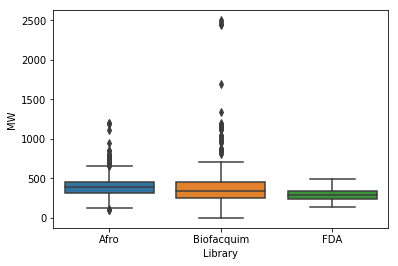

In [42]:
"""Plot a Descriptor"""
sns.boxplot(x = "Library", y = Data["MW"], data=Data)

In [45]:
#Identify Numerical Data (Descriptors)
Data.select_dtypes(np.number).columns

Index(['#Aromatic heavy atoms', '#H-bond acceptors', '#H-bond donors',
       '#Heavy atoms', '#Rotatable bonds', 'Ali Log S',
       'Ali Solubility (mg/ml)', 'Ali Solubility (mol/l)',
       'Bioavailability Score', 'Brenk #alerts', 'Consensus Log P',
       'Drug Like', 'ESOL Log S', 'ESOL Solubility (mg/ml)',
       'ESOL Solubility (mol/l)', 'Egan #violations', 'Fraction Csp3',
       'Ghose #violations', 'Leadlikeness #violations', 'Lipinski #violations',
       'MLOGP', 'MR', 'MW', 'Muegge #violations', 'PAINS #alerts',
       'Silicos-IT Log P', 'Silicos-IT LogSw', 'Silicos-IT Solubility (mg/ml)',
       'Silicos-IT Solubility (mol/l)', 'Synthetic Accessibility', 'TPSA',
       'Veber #violations', 'WLOGP', 'XLOGP3', 'iLOGP', 'log Kp (cm/s)'],
      dtype='object')

In [46]:
feature_names = ['#Aromatic heavy atoms', '#H-bond acceptors', '#H-bond donors',
       '#Heavy atoms', '#Rotatable bonds', 'Ali Log S',
       'Ali Solubility (mg/ml)', 'Ali Solubility (mol/l)',
       'Bioavailability Score', 'Brenk #alerts', 'Consensus Log P',
       'Drug Like', 'ESOL Log S', 'ESOL Solubility (mg/ml)',
       'ESOL Solubility (mol/l)', 'Egan #violations', 'Fraction Csp3',
       'Ghose #violations', 'Leadlikeness #violations', 'Lipinski #violations',
       'MLOGP', 'MR', 'MW', 'Muegge #violations', 'PAINS #alerts',
       'Silicos-IT Log P', 'Silicos-IT LogSw', 'Silicos-IT Solubility (mg/ml)',
       'Silicos-IT Solubility (mol/l)', 'Synthetic Accessibility', 'TPSA',
       'Veber #violations', 'WLOGP', 'XLOGP3', 'iLOGP', 'log Kp (cm/s)']

In [47]:
#Remove target columns
feature_names.remove('Drug Like')
feature_names

['#Aromatic heavy atoms',
 '#H-bond acceptors',
 '#H-bond donors',
 '#Heavy atoms',
 '#Rotatable bonds',
 'Ali Log S',
 'Ali Solubility (mg/ml)',
 'Ali Solubility (mol/l)',
 'Bioavailability Score',
 'Brenk #alerts',
 'Consensus Log P',
 'ESOL Log S',
 'ESOL Solubility (mg/ml)',
 'ESOL Solubility (mol/l)',
 'Egan #violations',
 'Fraction Csp3',
 'Ghose #violations',
 'Leadlikeness #violations',
 'Lipinski #violations',
 'MLOGP',
 'MR',
 'MW',
 'Muegge #violations',
 'PAINS #alerts',
 'Silicos-IT Log P',
 'Silicos-IT LogSw',
 'Silicos-IT Solubility (mg/ml)',
 'Silicos-IT Solubility (mol/l)',
 'Synthetic Accessibility',
 'TPSA',
 'Veber #violations',
 'WLOGP',
 'XLOGP3',
 'iLOGP',
 'log Kp (cm/s)']

In [48]:
#Convert numerial data into a new DF
df_feat = Data[feature_names]
df_feat.head()

,#Aromatic heavy atoms,#H-bond acceptors,#H-bond donors,#Heavy atoms,#Rotatable bonds,Ali Log S,Ali Solubility (mg/ml),Ali Solubility (mol/l),Bioavailability Score,Brenk #alerts,...,Silicos-IT LogSw,Silicos-IT Solubility (mg/ml),Silicos-IT Solubility (mol/l),Synthetic Accessibility,TPSA,Veber #violations,WLOGP,XLOGP3,iLOGP,log Kp (cm/s)
0,0,7,3,85,52,-32.61,2.960000e-30,2.480000e-33,0.17,1,...,-20.61,2.920000e-18,2.440000e-21,10.00,105.45,1,22.41,29.72,15.27,7.52
1,0,27,14,83,19,-5.13,8.840000e-03,7.400000e-06,0.17,1,...,4.02,1.260000e+07,1.050000e+04,10.00,418.89,2,-3.54,-3.10,5.55,-15.79
2,0,26,14,83,17,-6.01,1.170000e-03,9.800000e-07,0.17,1,...,3.48,3.630000e+06,3.040000e+03,10.00,393.98,2,-2.66,-1.75,5.80,-14.83
3,6,14,3,79,63,-27.92,1.350000e-25,1.210000e-28,0.11,2,...,-18.46,3.870000e-16,3.460000e-19,9.97,201.42,2,16.88,23.26,12.70,3.40
4,6,8,3,67,54,-26.06,8.140000e-24,8.630000e-27,0.17,2,...,-18.50,3.000000e-16,3.180000e-19,8.97,122.52,1,16.91,23.07,12.32,4.32


In [49]:
#Statistical values
df_feat.describe()

,#Aromatic heavy atoms,#H-bond acceptors,#H-bond donors,#Heavy atoms,#Rotatable bonds,Ali Log S,Ali Solubility (mg/ml),Ali Solubility (mol/l),Bioavailability Score,Brenk #alerts,...,Silicos-IT LogSw,Silicos-IT Solubility (mg/ml),Silicos-IT Solubility (mol/l),Synthetic Accessibility,TPSA,Veber #violations,WLOGP,XLOGP3,iLOGP,log Kp (cm/s)
count,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2.016000e+03,2.016000e+03,2016.000000,2016.000000,...,2016.000000,2.016000e+03,2.016000e+03,2016.000000,2016.000000,2016.000000,2016.000000,2016.00000,2016.000000,2016.000000
mean,8.267361,5.093750,1.997024,26.053571,4.527778,-4.785933,1.907376e+01,9.424622e-02,0.520084,0.750496,...,-4.541915,6.303797e+05,4.841053e+02,4.120476,81.644271,0.149306,3.156126,3.38752,2.936696,-6.118403
std,6.596371,4.051608,2.221705,12.555588,5.690550,3.109305,2.511777e+02,1.308659e+00,0.106836,0.891509,...,2.478155,2.542951e+07,1.899615e+04,1.678331,62.057860,0.403495,2.484294,2.93177,1.318862,1.953024
min,0.000000,0.000000,0.000000,0.000000,0.000000,-32.610000,2.960000e-30,2.480000e-33,0.110000,0.000000,...,-20.610000,2.920000e-18,2.440000e-21,1.000000,0.000000,0.000000,-5.940000,-4.18000,-0.540000,-17.190000
25%,0.000000,3.000000,1.000000,19.000000,2.000000,-5.815000,6.475000e-04,1.542500e-06,0.550000,0.000000,...,-5.902500,4.567500e-04,1.247500e-06,2.960000,46.530000,0.000000,1.700000,1.79000,2.130000,-7.000000
50%,6.000000,4.000000,1.500000,24.000000,3.000000,-4.220000,2.020000e-02,6.055000e-05,0.550000,1.000000,...,-4.510000,9.680000e-03,3.110000e-05,3.880000,68.200000,0.000000,2.890000,2.96000,2.865000,-6.140000
75%,12.000000,6.000000,3.000000,30.000000,5.000000,-3.050000,2.622500e-01,8.830000e-04,0.550000,1.000000,...,-3.030000,2.507500e-01,9.350000e-04,5.070000,99.110000,0.000000,4.270000,4.45000,3.550000,-5.280000
max,36.000000,47.000000,19.000000,174.000000,68.000000,1.600000,7.300000e+03,4.010000e+01,0.560000,5.000000,...,5.930000,1.140000e+09,8.510000e+05,10.000000,656.850000,2.000000,22.410000,29.72000,15.270000,7.520000


In [50]:
#Correlation
Correlation = df_feat.corr()
Correlation.head()

,#Aromatic heavy atoms,#H-bond acceptors,#H-bond donors,#Heavy atoms,#Rotatable bonds,Ali Log S,Ali Solubility (mg/ml),Ali Solubility (mol/l),Bioavailability Score,Brenk #alerts,...,Silicos-IT LogSw,Silicos-IT Solubility (mg/ml),Silicos-IT Solubility (mol/l),Synthetic Accessibility,TPSA,Veber #violations,WLOGP,XLOGP3,iLOGP,log Kp (cm/s)
#Aromatic heavy atoms,1.000000,0.126409,0.108790,0.084418,-0.103818,-0.057033,-0.076670,-0.075425,-0.123938,-0.191020,...,-0.443636,-0.031084,-0.031953,-0.250622,0.107207,0.005505,0.030473,0.014441,0.002236,-0.008776
#H-bond acceptors,0.126409,1.000000,0.787660,0.800916,0.519318,-0.296625,-0.013616,-0.017152,-0.621384,0.149507,...,0.185524,0.167332,0.169786,0.578521,0.947672,0.662931,-0.194023,-0.105600,0.041420,-0.566878
#H-bond donors,0.108790,0.787660,1.000000,0.623475,0.382184,-0.237665,0.018726,0.013147,-0.645630,0.085066,...,0.283563,0.185489,0.188512,0.457802,0.869911,0.663715,-0.237985,-0.130913,-0.058545,-0.493940
#Heavy atoms,0.084418,0.800916,0.623475,1.000000,0.658180,-0.700880,-0.079258,-0.080539,-0.586832,0.188960,...,-0.261144,0.127304,0.128677,0.786677,0.751593,0.607928,0.318044,0.397783,0.464867,-0.119422
#Rotatable bonds,-0.103818,0.519318,0.382184,0.658180,1.000000,-0.648599,-0.008307,-0.008330,-0.469302,0.139641,...,-0.244546,0.108655,0.109902,0.388101,0.490988,0.622941,0.329325,0.453884,0.465529,0.113119


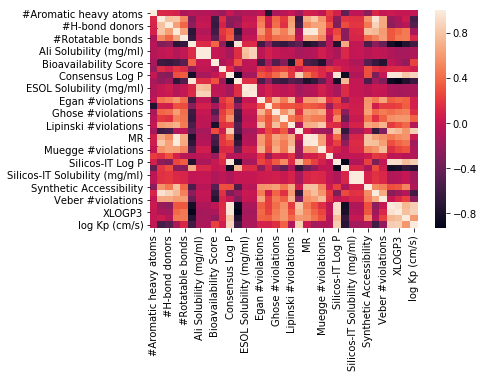

In [51]:
sns.heatmap(df_feat.corr())
plt.savefig("correlacion_inicial.png")

In [52]:
#Delete correlated variables (Avoid Overfitting)
feature_names.remove('XLOGP3')
feature_names.remove('iLOGP')
feature_names.remove('log Kp (cm/s)')
feature_names.remove('Silicos-IT LogSw')
feature_names.remove('Ali Solubility (mol/l)')
feature_names.remove('Ali Solubility (mg/ml)')
feature_names.remove('Consensus Log P')
feature_names.remove('ESOL Solubility (mg/ml)')
print(feature_names)

['#Aromatic heavy atoms', '#H-bond acceptors', '#H-bond donors', '#Heavy atoms', '#Rotatable bonds', 'Ali Log S', 'Bioavailability Score', 'Brenk #alerts', 'ESOL Log S', 'ESOL Solubility (mol/l)', 'Egan #violations', 'Fraction Csp3', 'Ghose #violations', 'Leadlikeness #violations', 'Lipinski #violations', 'MLOGP', 'MR', 'MW', 'Muegge #violations', 'PAINS #alerts', 'Silicos-IT Log P', 'Silicos-IT Solubility (mg/ml)', 'Silicos-IT Solubility (mol/l)', 'Synthetic Accessibility', 'TPSA', 'Veber #violations', 'WLOGP']


In [53]:
#Generate new DF (Whitout correlated data)
df_feat = Data[feature_names]

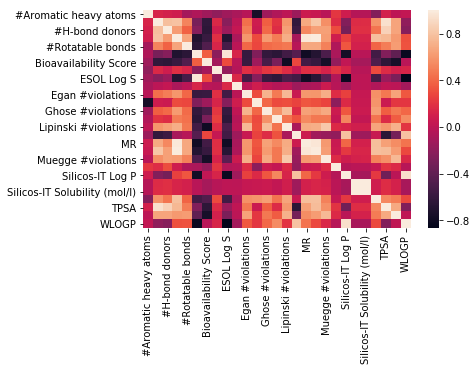

In [54]:
#Visualize new correlation matrix
Correlation = df_feat.corr()
sns.heatmap(df_feat.corr())
plt.savefig("correlacion_final.png")

In [57]:
#Convert target into a new DF
df_target = pd.DataFrame(Data['Drug Like'],columns=['Drug Like'])
#df_target

# Machine Learning Model

## SVM

In [58]:
#Train Test Split
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, np.ravel(df_target), test_size = 0.30, random_state=101)

In [60]:
#Import Support Vector Classifier
from sklearn.svm import SVC

In [61]:
#Assign Model
model = SVC()

In [27]:
#Train model
model.fit(X_train,y_train)

/home/babs/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## Predictions

In [ ]:
Now let's' predict If a Molecule has"Drug Like" properties
using the trained model.

In [ ]:
#Write a function to select descriptors for a single compound
def test_compound(Library, Name):
    FDA = Data[Data["Library"]== Library]
    test = FDA[FDA["Name"]== Name]
    test = test[feature_names]
    #print(test.head())
    return test

In [ ]:
#test = test_compound("FDA", "Acetaminophen")
#test = test_compound("FDA", "Ambroxol")
test = test_compound("Biofacquim", "Purgic_acid_A")

In [ ]:
#Visualice test descriptors
test 

In [ ]:
#Predic result for test compound (test variable)
model.predict(test)

## Evaluate the model

In [29]:
predictions = model.predict(X_test) 

In [62]:
#import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score

Note: Metrics Documentation
scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics

In [63]:
print(accuracy_score(y_test,predictions))

0.7454545454545455


In [35]:
#Compute confusion matrix
print(confusion_matrix(y_test,predictions))

[[399   6]
 [148  52]]


In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.99      0.84       405
           1       0.90      0.26      0.40       200

   micro avg       0.75      0.75      0.75       605
   macro avg       0.81      0.62      0.62       605
weighted avg       0.78      0.75      0.69       605



In [39]:
#ROC
print(roc_curve(y_test, predictions))

(array([0.        , 0.01481481, 1.        ]), array([0.  , 0.26, 1.  ]), array([2, 1, 0]))


In [40]:
print(roc_auc_score(y_test, predictions))

0.6225925925925926
